# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<a id="1"></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv ('/content/sample_data/real_estate_data.csv', sep='\t')
print(data.head(10))

   total_images  last_price  ...  ponds_nearest days_exposition
0            20  13000000.0  ...          755.0             NaN
1             7   3350000.0  ...            NaN            81.0
2            10   5196000.0  ...          574.0           558.0
3             0  64900000.0  ...          234.0           424.0
4             2  10000000.0  ...           48.0           121.0
5            10   2890000.0  ...            NaN            55.0
6             6   3700000.0  ...            NaN           155.0
7             5   7915000.0  ...            NaN             NaN
8            20   2900000.0  ...            NaN           189.0
9            18   5400000.0  ...            NaN           289.0

[10 rows x 22 columns]


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [40]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В датафрейме 23699 строки, имеются пропуски данных, аномальные значения данных, необходимо изменить типы данных некоторых столбцов на числовые, целочисленные или булевые.

### Шаг 2. Предобработка данных

<a id="21"></a>
### Пропущенные значения


1. Проверю 0 количество комнат

In [41]:
data[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [42]:
rooms_null = data[data['rooms'] == 0]
rooms_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 144 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          197 non-null    int64  
 1   last_price            197 non-null    float64
 2   total_area            197 non-null    float64
 3   first_day_exposition  197 non-null    object 
 4   rooms                 197 non-null    int64  
 5   ceiling_height        82 non-null     float64
 6   floors_total          194 non-null    float64
 7   living_area           183 non-null    float64
 8   floor                 197 non-null    int64  
 9   is_apartment          6 non-null      object 
 10  studio                197 non-null    bool   
 11  open_plan             197 non-null    bool   
 12  kitchen_area          0 non-null      float64
 13  balcony               126 non-null    float64
 14  locality_name         197 non-null    object 
 15  airports_nearest   

Проверю все ли это студии

In [43]:
data[(data['rooms'] == 0) & (data['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,NaN,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,NaN,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


Все эти строки по всем параметрам студии, но не студии, исправлю это

In [44]:
data.loc[data['rooms'] == 0, 'studio'] = True
data[(data['rooms'] == 0) & (data['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


2. Имеются пропуски высоты потолков. Минимальная высота потолков по СНиП 2.5 метра, максимальная высота не регламентируется, возьмем не более 10 метров. Все результаты выбивающиеся заменю на медиану  
Визуализирую на гистограмме

Text(0.5, 0, 'Высота м.')

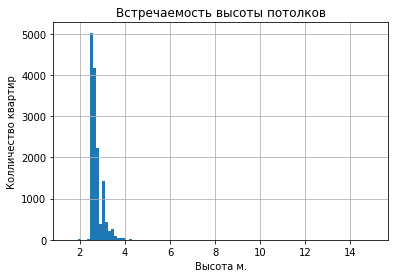

In [45]:
data['ceiling_height'].hist(bins=100, range=(1.5, 15)) 
plt.title("Встречаемость высоты потолков")
plt.ylabel("Колличество квартир")
plt.xlabel("Высота м.")

Как и следовало ожидать пик высоты потолков на 2.5м.
Заменяем пропуски на медиану

In [46]:
height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(height_median)
data['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

3. Число пропущенных этажностей дома не возможно определить исходя из данных. Эти данные необходимы будут в анализе. Количество пропусков незначительно, заменим на медиану высоты в населенном пункте

In [47]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')
floors_total_med = dict(data.pivot_table(index = 'locality_name', values = 'floors_total', aggfunc = 'median')['floors_total'])
type(floors_total_med)
def floors_total_fun(row):
    loc_name = row['locality_name']
    fl_total = row['floors_total']
    if fl_total == 0:
        for key, value in floors_total_med.items():
            if key in loc_name:
                return value
    
    return fl_total
data['floors_total'] = data.apply(floors_total_fun, axis=1)
    

4. Пропуски жилой площади заменю на отношение средней жилой площади к жилой площади по строке

Text(0.5, 0, 'Жилая')

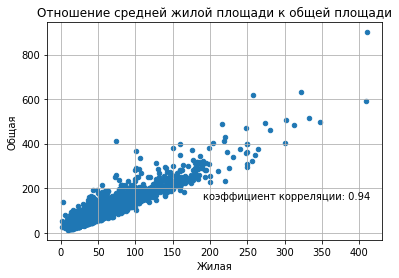

In [48]:
data.plot(x='living_area', y='total_area', kind='scatter', grid=True) 
plt.text(190, 150, 'коэффициент корреляции: ' + str(round(data['living_area'].corr(data['total_area']), 2)))
plt.title("Отношение средней жилой площади к общей площади")
plt.ylabel("Общая")
plt.xlabel("Жилая")

По диаграмме рассеивания, и коэффициенту корреляции прослеживается линейность отношение общей площади к жилой площади

In [49]:
mean_living_area = (data['living_area'] / data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(round((data['total_area'] *mean_living_area), 1))
data['living_area'].isna().value_counts()

False    23650
Name: living_area, dtype: int64

5. Пропуски площади кухни так же заменю на отношение средней площади кухни к жилой площади по строке.  


Text(0.5, 0, 'Кухня')

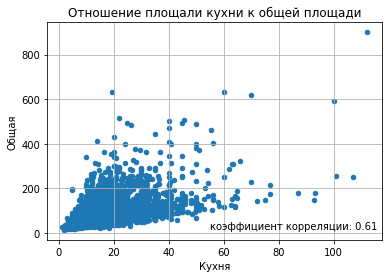

In [50]:
data.plot(x='kitchen_area', y='total_area', kind='scatter', grid=True) 
plt.text(55, 20, 'коэффициент корреляции: ' + str(round(data['kitchen_area'].corr(data['total_area']), 2)))
plt.title("Отношение площали кухни к общей площади")
plt.ylabel("Общая")
plt.xlabel("Кухня")

In [51]:
mean_kitchen_area = (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(round((data['total_area'] *mean_kitchen_area), 1))
data['kitchen_area'].isna().value_counts()

False    23650
Name: kitchen_area, dtype: int64

Заменим  значения площади кухни в квартирах-студиях на нули

In [52]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data.loc[data['studio'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,NaN,True,False,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,NaN,True,True,0.0,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,NaN,True,False,0.0,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,NaN,True,True,0.0,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,14.10,7,NaN,True,False,0.0,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23162,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,NaN,True,False,0.0,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23393,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,NaN,True,True,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23505,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,14.70,8,NaN,True,False,0.0,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23543,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,NaN,True,True,0.0,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Проверю на ошибки ввода площади, есть ли квартиры где сумма жилой площади и кухни больше общей

In [53]:
data.query('total_area < (living_area+kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,False,False,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,False,False,18.40,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,NaN,False,False,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,False,False,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,False,False,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22050,6,2194000.0,36.50,2017-09-27T00:00:00,1,2.65,3.0,33.20,3,NaN,False,False,6.80,0.0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0
22860,9,65000000.0,228.00,2016-06-02T00:00:00,4,2.65,5.0,200.00,2,NaN,False,False,42.70,NaN,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
23054,0,5800000.0,66.00,2017-06-09T00:00:00,5,2.65,5.0,55.50,1,NaN,False,False,12.40,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23143,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.65,16.0,16.00,12,NaN,False,False,3.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0


Сумма жилой площади и кухни больше общей, ошибки ввода данных. Удалю строки с ошибками

In [54]:
data = data.query('total_area > (living_area+kitchen_area)')
data.query('total_area < (living_area+kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


6. Пропущено около половины данных по числам балконов. Предположу что пропущенные значения равны 0.

In [55]:
data['balcony'] = data['balcony'].fillna(0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


7. Пропусков локализаций городов очень мало, восстановить данные нет возможности, а локализация очень важна при оценке стоимости, удаляем

In [56]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23474 entries, 0 to 23473
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23474 non-null  int64  
 1   last_price            23474 non-null  float64
 2   total_area            23474 non-null  float64
 3   first_day_exposition  23474 non-null  object 
 4   rooms                 23474 non-null  int64  
 5   ceiling_height        23474 non-null  float64
 6   floors_total          23474 non-null  float64
 7   living_area           23474 non-null  float64
 8   floor                 23474 non-null  int64  
 9   is_apartment          2727 non-null   object 
 10  studio                23474 non-null  bool   
 11  open_plan             23474 non-null  bool   
 12  kitchen_area          23474 non-null  float64
 13  balcony               23474 non-null  float64
 14  locality_name         23474 non-null  object 
 15  airports_nearest   

8. Пропуски расстояния до центра и непосредственно в городе Санкт-Петербурге

In [57]:
data['cityCenters_nearest'].isna().sum()

5450

In [58]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,2.65,10.0,38.4,6,NaN,False,False,12.7,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,20,4200000.0,38.30,2019-04-16T00:00:00,1,2.60,16.0,19.8,10,NaN,False,False,10.1,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,11,9899000.0,101.00,2018-12-12T00:00:00,3,3.00,5.0,62.0,3,NaN,False,False,15.0,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,7,37000000.0,161.00,2016-05-22T00:00:00,3,2.65,9.0,84.0,8,NaN,False,False,30.2,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
788,19,7100000.0,59.60,2019-02-13T00:00:00,2,3.40,5.0,36.6,2,NaN,False,False,12.5,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21467,9,4500000.0,34.30,2019-03-04T00:00:00,1,2.65,9.0,17.5,3,NaN,False,False,8.9,1.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21676,15,44500000.0,169.00,2019-02-28T00:00:00,3,3.30,9.0,101.0,7,NaN,False,False,18.0,4.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21748,19,130000000.0,431.00,2017-10-02T00:00:00,7,3.70,8.0,220.0,5,NaN,False,False,20.0,5.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0
22341,5,3415000.0,31.65,2019-04-16T00:00:00,1,2.65,24.0,17.9,14,NaN,False,False,8.7,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проверю может быть не в СПб просто не отмечают центр

In [59]:
data[data['locality_name'] != 'Санкт-Петербург'].count()

total_images            7860
last_price              7860
total_area              7860
first_day_exposition    7860
rooms                   7860
ceiling_height          7860
floors_total            7860
living_area             7860
floor                   7860
is_apartment             915
studio                  7860
open_plan               7860
kitchen_area            7860
balcony                 7860
locality_name           7860
airports_nearest        2472
cityCenters_nearest     2471
parks_around3000        2472
parks_nearest            777
ponds_around3000        2472
ponds_nearest           1100
days_exposition         6768
dtype: int64

В меньшем количестве, но отмечают. Думаю, что параметр расстояния до центра города важен только в Санкт-Петербурге. Поэтому квартиры без расстояния до центра в Санкт Петербурге пойдут под нож.

In [60]:
data = data[(data['locality_name'] != 'Санкт-Петербург') 
            | ((data['locality_name'] == 'Санкт-Петербург') 
               & (~data['cityCenters_nearest'].isna()))].reset_index(drop=True)


9. Заменил пропуски в остальных параметрах на нули и False  соответственно

In [61]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)
data.dropna(subset = ['floors_total'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23413 entries, 0 to 23412
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23413 non-null  int64  
 1   last_price            23413 non-null  float64
 2   total_area            23413 non-null  float64
 3   first_day_exposition  23413 non-null  object 
 4   rooms                 23413 non-null  int64  
 5   ceiling_height        23413 non-null  float64
 6   floors_total          23413 non-null  float64
 7   living_area           23413 non-null  float64
 8   floor                 23413 non-null  int64  
 9   is_apartment          23413 non-null  bool   
 10  studio                23413 non-null  bool   
 11  open_plan             23413 non-null  bool   
 12  kitchen_area          23413 non-null  float64
 13  balcony               23413 non-null  float64
 14  locality_name         23413 non-null  object 
 15  airports_nearest   

<a id="22"></a>
10. Оптимизируем данные по регистру и целочисленному значению. точности до сантиметров нам не нужны

In [62]:
data['floors_total'] = data['floors_total'].astype('int')# надеюсь нет этажей 9 3/4
data['last_price'] = data['last_price'].astype('int') # Цена без копеек
data['balcony'] = data['balcony'].astype('int') # Любой балкон это балкон
data['parks_around3000'] = data['parks_around3000'].astype('int') # Точность до метра
data['ponds_around3000'] = data['ponds_around3000'].astype('int') # Точность до метра
data['locality_name'] = data['locality_name'].str.lower() # На всякий случай привел в нижней регистр, хотя визуально отклонений не заметил
data['days_exposition'] = data['days_exposition'].astype('int') # Удобнее оперировать целыми днями

8. Пропуски расстояния до аэропорта

In [63]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].astype('int')
air_med = dict(data.pivot_table(index = 'locality_name', values = 'airports_nearest', aggfunc = 'median')['airports_nearest'])
type(air_med)
def air_nearest(row):
    loc_name = row['locality_name']
    air_nearest = row['airports_nearest']
    if air_nearest == 0:
        for key, value in air_med.items():
            if key in loc_name:
                return value
    
    return air_nearest
data['airports_nearest'] = data.apply(air_nearest, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23413 non-null  int64  
 1   last_price            23413 non-null  int64  
 2   total_area            23413 non-null  float64
 3   first_day_exposition  23413 non-null  object 
 4   rooms                 23413 non-null  int64  
 5   ceiling_height        23413 non-null  float64
 6   floors_total          23413 non-null  int64  
 7   living_area           23413 non-null  float64
 8   floor                 23413 non-null  int64  
 9   is_apartment          23413 non-null  bool   
 10  studio                23413 non-null  bool   
 11  open_plan             23413 non-null  bool   
 12  kitchen_area          23413 non-null  float64
 13  balcony               23413 non-null  int64  
 14  locality_name         23413 non-null  object 
 15  airports_nearest   

### Шаг 3. Посчитайте и добавьте в таблицу

<a id="31"></a>
Создадим параметр цены квадратного метра.

In [64]:
data['price_m2'] = round(data['last_price'] / data['total_area'], 2)

<a id="32"></a>
День месяц и год публикации

In [65]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # для дробления на месяцы дни и годы необходимо перевести в формат даты
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['first_day_exposition'] = data['first_day_exposition'].dt.date # переводим в целое число

<a id="33"></a>
Этаж квартиры (первый, последний, другой):

In [66]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

<a id="34"></a>
Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [67]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id="41"></a>

#### 1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

#### Площадь

13.0
900.0


(0.0, 300.0)

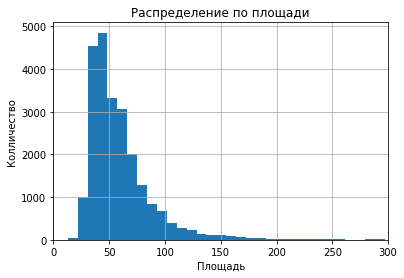

In [68]:
data['total_area'].hist(bins=100)
print(data['total_area'].min())
print(data['total_area'].max())
plt.title("Распределение по площади")
plt.ylabel("Колличество")
plt.xlabel("Площадь")
plt.xlim(0, 300)

(0.0, 200.0)

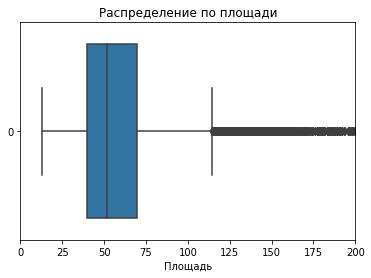

In [69]:
sns.boxplot(data=data['total_area'], orient="h")
plt.title("Распределение по площади")
plt.xlabel("Площадь")
plt.xlim(0, 200)

Малопонятны границы размаха. Напишу функцию которая будет давать эти цифры

In [70]:
def Span_charts(column):
    stat = data[column].describe()
    quantile = stat[6] - stat[4]     
    left_mustache = round(stat[4] - 1.5 * quantile, 2)
    right_mustache = round(stat[6] + 1.5 * quantile, 2)
    if left_mustache < stat[3]:
        left_mustache = stat[3] 
    if right_mustache > stat[7]:
        right_mustache = stat[7]
        
    return [left_mustache, right_mustache]
Span_charts('total_area')

[13.0, 114.25]

Судя по гистограмме квартир площадью более 300 кв метров очень мало. А в целом выбивающиеся значения меньше больше 115 метров.

Красивая гистограмма

Text(0.5, 0, 'Площадь')

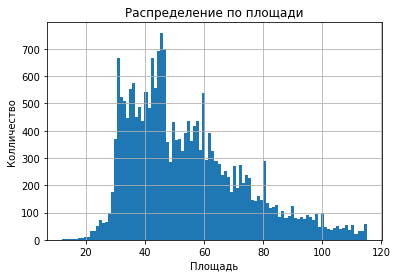

In [71]:
data['total_area'].hist(bins=100, range=(12.0, 115))
plt.title("Распределение по площади")
plt.ylabel("Колличество")
plt.xlabel("Площадь")

Создадим "хорошие" данные удобные для анализа на основе границ выбивающихся данных, в дальнейшем будем их дополнять

In [72]:
data_good = data.query('total_area <= 114.25')


Число балконов

0
5


[0.0, 2.5]

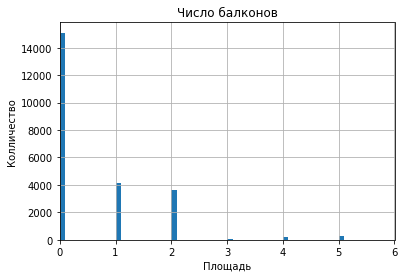

In [73]:

data['balcony'].hist(bins=100, range=(0, 10))
print(data['balcony'].min())
print(data['balcony'].max())
plt.title("Число балконов")
plt.ylabel("Колличество")
plt.xlabel("Площадь")
plt.xlim(0, 6)
Span_charts('balcony')

#### Цена

12190
763000000


Text(0.5, 0, 'Цены')

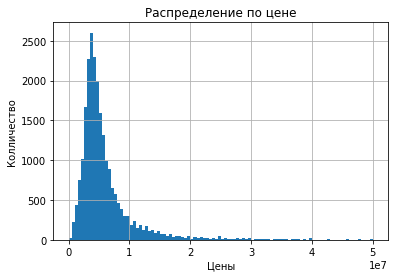

In [74]:
data['last_price'].hist(bins=100, range=(0, 50075000.0))
print(data['last_price'].min())
print(data['last_price'].max())
plt.title("Распределение по цене")
plt.ylabel("Колличество")
plt.xlabel("Цены")

Гистограмма совсем неинформативна, понятно, что недвижимости дороже 100 мл крайне мало. Надо будет убирать выбивающиеся данные.  
Для этого построим квадратный график

(0.0, 14775000.0)

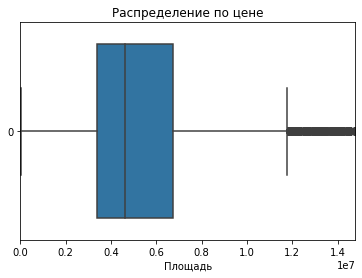

In [75]:
sns.boxplot(data=data['last_price'], orient="h")

plt.title("Распределение по цене")
plt.xlabel("Площадь")
plt.xlim(0, 14775000.0)

In [76]:
Span_charts('last_price')

[12190.0, 11775000.0]

In [77]:
data_good = data_good.query('last_price < 11775000.0')

#### Колличество комнат

0
19


(0.0, 10.0)

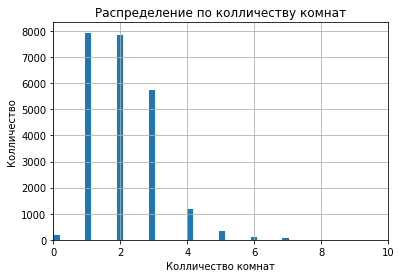

In [78]:
data['rooms'].hist(bins=100)
print(data['rooms'].min())
print(data['rooms'].max())
plt.title("Распределение по колличеству комнат")
plt.ylabel("Колличество")
plt.xlabel("Колличество комнат")
plt.xlim(0, 10)

(0.0, 10.0)

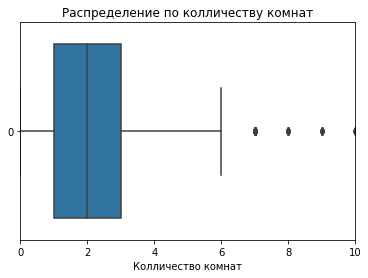

In [79]:
sns.boxplot(data=data['rooms'], orient="h")
Span_charts('rooms')
plt.title("Распределение по колличеству комнат")
plt.xlabel("Колличество комнат")
plt.xlim(0, 10)

Количество квартир с комнатами больше 6 очень мало.
Странное чувство что, когда цифры маленькие, даже если они выбиваются их хочется оставить. 

In [80]:
data_good = data_good.query('rooms < 7')


<a id="ceiling_height"></a>
#### Высота потолков

1.0
32.0


Text(0.5, 0, 'Высота')

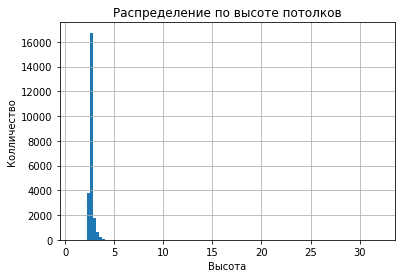

In [81]:
data['ceiling_height'].hist(bins=100)
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())
plt.title("Распределение по высоте потолков")
plt.ylabel("Колличество")
plt.xlabel("Высота")


Для анализа можно ораничить 5 метрами.

Text(0.5, 0, 'Высота')

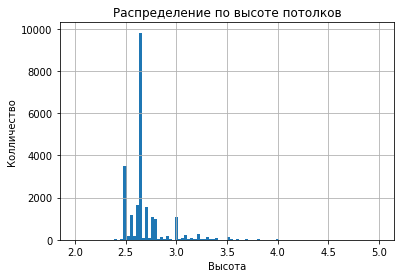

In [82]:

data['ceiling_height'].hist(bins=100, range=(2.0, 5))
plt.title("Распределение по высоте потолков")
plt.ylabel("Колличество")
plt.xlabel("Высота")


(2.2, 3.0)

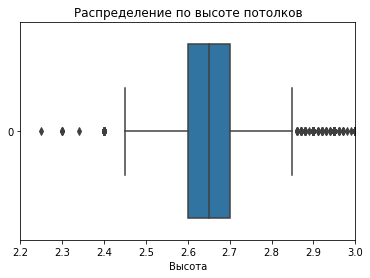

In [83]:
sns.boxplot(data=data['ceiling_height'], orient="h", )
Span_charts('ceiling_height')
plt.title("Распределение по высоте потолков")
plt.xlabel("Высота")
plt.xlim(2.2, 3)

In [84]:
data_good = data_good.query('ceiling_height < 4') # мне показалось что слишком много данных теряеться на зубце в 3 метра.


In [85]:
round(len(data_good)/len(data), 2)*100


90.0

Выжило 90 процентов данных

<a id="42"></a>

#### 2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Построим гистограмму колличества дней, за которое продавали квартиры


(0.0, 1500.0)

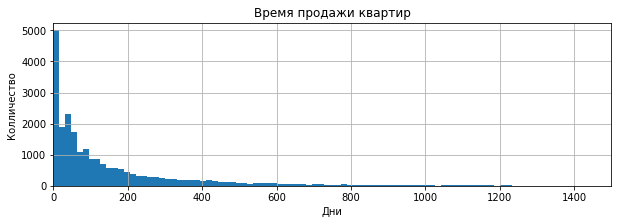

In [86]:
data['days_exposition'].hist(bins=100, figsize=(10, 3))
plt.title("Время продажи квартир")
plt.ylabel("Колличество")
plt.xlabel("Дни")
plt.xlim(0, 1500)

Построим диагарму размаха


Text(0.5, 0, 'Дни')

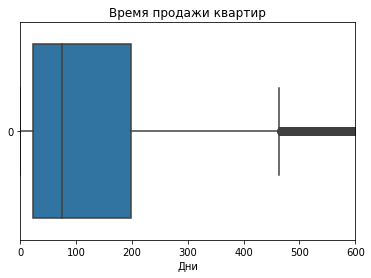

In [87]:
sns.boxplot(data=data['days_exposition'], orient="h")
plt.xlim(0, 600)
plt.title("Время продажи квартир")
plt.xlabel("Дни")

In [88]:
data['days_exposition'].describe()

count    23413.000000
mean       156.915773
std        213.896773
min          0.000000
25%         23.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по полученным данным, продажа в среднем занимает 74 дней или 2.5 месяца.  
Если квартира продана за 23 дня считайте, что вам повезло (а может вы оценили квартиру ниже рынка, надо не забыть отследить это)  
Если же квартира не продалась за 199 дней, то что-то не так, это слишком долго.

In [89]:
print(data.head())

   total_images  last_price  ...  living_area_ratio kitchen_area_ratio
0            20    13000000  ...              0.472              0.231
1             7     3350000  ...              0.460              0.272
2            10     5196000  ...              0.612              0.148
3             0    64900000  ...              0.565              0.187
4             2    10000000  ...              0.320              0.410

[5 rows x 29 columns]


<a id="43"></a>
#### 3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Выбивающиеся значения я определял, не отходя от графиков.
Хорошая дата = data.query('левый ус <= Столбец <= правый ус')
round(len(data_good)/len(data), 2)*100
Выжило 57 процентов данных

Статистически редко встречающиеся параметры продаваемых квартир:
1. Площадью более 114.25 кв. м
2. 7 комнат и более («Я один живу и работаю в семи комнатах, и желал бы иметь восьмую! Она мне необходима под библиотеку». Профессор Преображенский был не прав)
3. Продажа квартир с высотой потолков менее 2.5 метров незаконна, более 3.22 м встречаются не часто.
4. Цена более 11,7 млн рублей
5. Проданные за 428 дней или более    
6. Больше 2х балконов редко встречается

<div class="alert alert-block alert-info">
<b>
</b>   
</div>


<a id="44"></a>
#### 4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Сделал матрицу диаграм поизучать

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.693098  0.804783        0.263290
last_price        0.693098    1.000000  0.432523        0.356745
rooms             0.804783    0.432523  1.000000        0.080665
ceiling_height    0.263290    0.356745  0.080665        1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fd8be1890>,
      dtype=object)

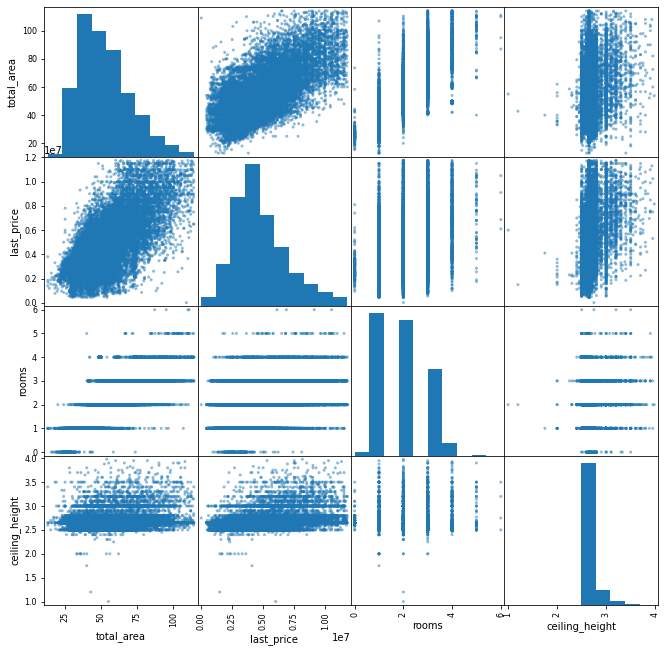

In [90]:
data_good_stat = data_good.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
print(data_good_stat.corr())
pd.plotting.scatter_matrix(data_good_stat, figsize=(11, 11))

#### - Зависимость цены от площади квартиры и от расстояния до центра города

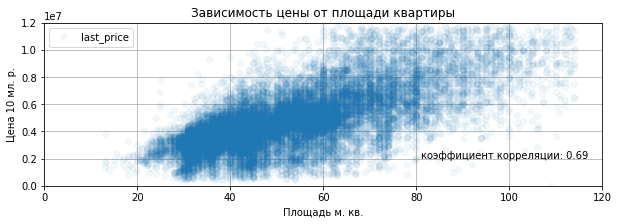

In [91]:
data_good.sort_values('total_area').plot(
    x='total_area', 
    y='last_price', 
    style='o', 
    grid=True, 
    figsize=(10, 3), 
    alpha=0.05,  
    ylim=(0,12000000), 
    xlim=(0,120)    
)
plt.title("Зависимость цены от площади квартиры")
plt.xlabel("Площадь м. кв.")
plt.ylabel("Цена 10 мл. р.")
plt.text(81, 2000000, 'коэффициент корреляции: ' + str(round(data_good['last_price'].corr(data_good['total_area']), 2)))
plt.show()

#### - Зависимость цены от числа комнат

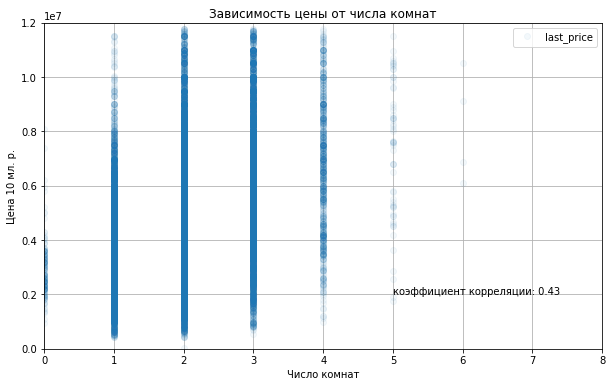

In [92]:
data_good.sort_values('rooms').plot(
    x='rooms', 
    y='last_price', 
    style='o', 
    grid=True, 
    figsize=(10, 6), 
    alpha=0.05,  
    ylim=(0,12000000), 
    xlim=(0,8)    
)
plt.title("Зависимость цены от числа комнат")
plt.xlabel("Число комнат")
plt.ylabel("Цена 10 мл. р.")
plt.text(5, 2000000, 'коэффициент корреляции: ' + str(round(data_good['last_price'].corr(data_good['rooms']), 2)))
plt.show()

#### - Зависимость цены от удаленности от центра

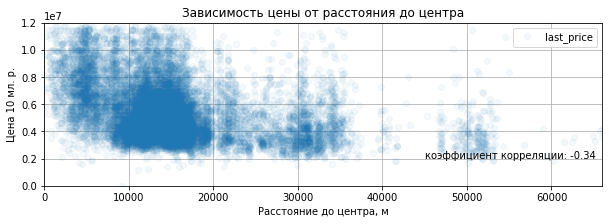

In [93]:
data_good.sort_values('cityCenters_nearest').plot(
    x='cityCenters_nearest', 
    y='last_price', 
    style='o', 
    grid=True, 
    figsize=(10, 3), 
    alpha=0.05,  
    ylim=(0,12000000), 
    xlim=(0,66000)    
)
plt.title("Зависимость цены от расстояния до центра")
plt.xlabel("Расстояние до центра, м")
plt.ylabel("Цена 10 мл. р.")
plt.text(45000, 2000000, 'коэффициент корреляции: ' + str(round(data_good['last_price'].corr(data_good['cityCenters_nearest']), 2)))
plt.show()

По всем городам картина размытая, надо брать по Питеру

#### - Зависимость от этажа

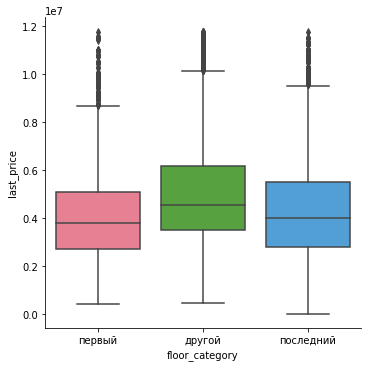

In [94]:
sns.catplot(x="floor_category", y="last_price", kind="box", data=data_good, palette='husl')

#### - Зависимость от дня недели, месяца и года

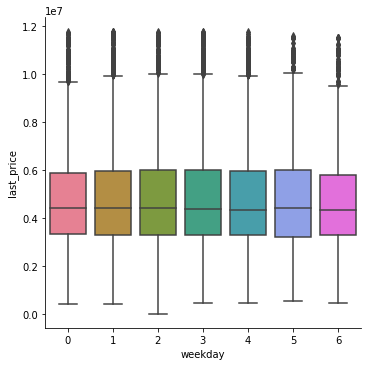

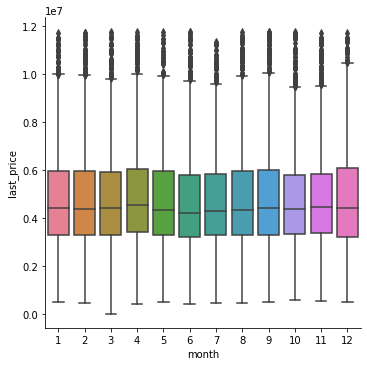

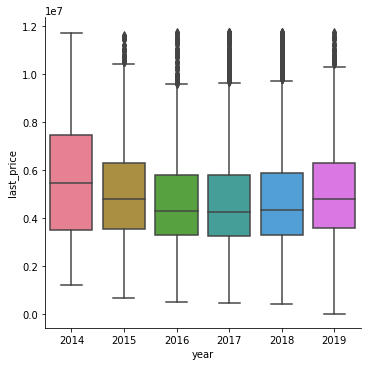

In [95]:
import seaborn as sns
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=data_good, palette='husl') #через seaborn будет визально понятнее

#### Факторы, влияющие на стоимость квартиры

Наиболее сильно влияет на стоимость квартиры ее площадь (коэффициент корреляции 0,66).  
В меньшей степени, но все равно достаточно сильно стоимость квартиры зависит от числа комнат. (коэффициент корреляции 0,43).  
Расстояние до центра тоже влияет на стоимость квартиры (коэффициент корреляции -0,31).  
Квартиры на первом или последнем этаже обычно продаются дешевле, чем квартиры на других этажах.  
День недели не влияет на стоимость квартир.
В декабре прослеживается больший разброс стоимости, можно косвенно судить о успешности разных сделок с недвижимостью в этот месяц.  
В 2014 году был подъем цен, скорее всего это было связанно с экономической и политической ситуацией, люди скупали все на стремительно падающий рубль, дальше до 2017 года было уменьшение цен, на момент 2019 года наблюдается рост цен.

<a id="45"></a>
#### 5. Выберите 10 населённых пунктов с наибольшим числом объявлений.

In [96]:
data_pivot_locality_name = data_good.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'median'])
data_pivot_locality_name.columns = ['count', 'median']
data_pivot_locality_name.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,13415,101918.470
посёлок мурино,513,85714.290
посёлок шушары,436,76747.970
всеволожск,384,65737.870
пушкин,334,98454.745
колпино,334,74723.745
посёлок парголово,325,91642.860
гатчина,297,67695.960
деревня кудрово,295,91803.280


Дороже всего жить в Петербурге, в Выборге дешевле всего.

<a id="46"></a>
#### 6. Выделение центра Санкт-Петербурга

In [97]:
spb = data_good.loc[(data_good['locality_name'] == 'санкт-петербург') & (data_good['cityCenters_nearest'].notna())]
spb.reset_index(drop=True, inplace=True)
spb['centers_km'] = round(spb['cityCenters_nearest'] / 1000, 0).astype('Int64')
spb_cent_m2 = spb.pivot_table(index='centers_km', values='last_price', aggfunc='median')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


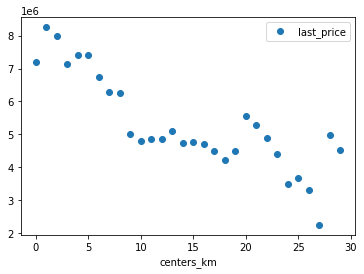

In [98]:
spb_cent_m2.plot(style='o')

Резкая разница цены в 1 мл. между 8 и 9 км. Будем считать, что центр имеет радиус 8 км.

<a id="47"></a>
#### 7. Проанализируйте сегмент квартир в центре  

In [99]:
spb_centr = spb[spb['centers_km'] <= 8] # Ограничил центр 8 км. Хотя если задуматся Питер со своим островным делением достаточно сложный по ценообразованию.  
spb_centr.reset_index(drop=True, inplace=True)


In [100]:
spb_centr.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,living_area_ratio,kitchen_area_ratio,centers_km
count,2617.000000,2.617000e+03,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,1635.000000,2617.000000,1849.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000
mean,9.523500,7.180963e+06,63.286316,2.230417,2.847757,7.559419,36.868750,4.199847,10.939862,0.298433,24996.688575,5262.662973,0.908674,474.369419,1.220099,481.366144,189.449752,117673.039958,2.559037,6.472679,2017.235384,0.573408,0.181412,5.212075
std,5.585614,2.148181e+06,20.696937,0.950225,0.286513,4.414279,15.273599,3.064700,4.770392,0.694541,5620.408635,1976.845871,0.873316,312.655307,1.053105,261.227749,247.849162,28587.141567,1.727313,3.442088,1.078885,0.105478,0.076558,1.959968
min,0.000000,1.600000e+06,13.000000,0.000000,2.400000,2.000000,2.000000,1.000000,0.000000,0.000000,11247.000000,208.000000,0.000000,11.000000,0.000000,22.000000,0.000000,17391.300000,0.000000,1.000000,2014.000000,0.038000,0.000000,0.000000
25%,5.000000,5.600000e+06,46.300000,2.000000,2.650000,5.000000,25.000000,2.000000,8.000000,0.000000,21172.000000,3948.000000,0.000000,287.000000,0.000000,264.000000,26.000000,96666.670000,1.000000,3.000000,2017.000000,0.517000,0.130000,4.000000
50%,9.000000,7.000000e+06,61.600000,2.000000,2.700000,6.000000,35.000000,3.000000,10.000000,0.000000,24294.000000,5164.000000,1.000000,441.000000,1.000000,463.000000,90.000000,113333.330000,3.000000,6.000000,2017.000000,0.579000,0.169000,5.000000
75%,13.000000,8.780000e+06,77.800000,3.000000,3.000000,9.000000,47.000000,5.000000,13.000000,0.000000,28880.000000,6839.000000,1.000000,595.000000,2.000000,671.000000,252.000000,134854.770000,4.000000,10.000000,2018.000000,0.649000,0.209000,7.000000
max,32.000000,1.176800e+07,114.200000,6.000000,3.980000,28.000000,90.200000,23.000000,48.300000,5.000000,44775.000000,8499.000000,3.000000,2295.000000,3.000000,1199.000000,1497.000000,292307.690000,6.000000,12.000000,2019.000000,0.902000,0.613000,8.000000


#### Площадь квартир в центре

In [101]:
spb_centr['total_area'].describe()

count    2617.000000
mean       63.286316
std        20.696937
min        13.000000
25%        46.300000
50%        61.600000
75%        77.800000
max       114.200000
Name: total_area, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


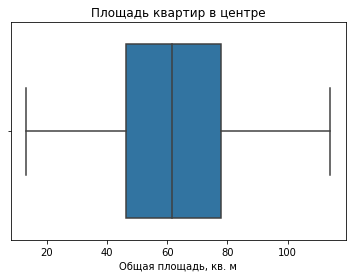

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


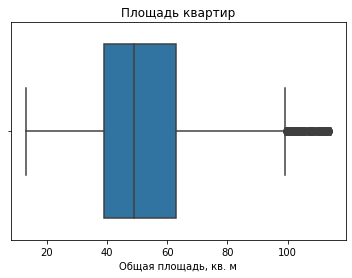

In [102]:
sns.boxplot(spb_centr['total_area'])
plt.title('Площадь квартир в центре')
plt.xlabel('Общая площадь, кв. м')
plt.show()

sns.boxplot(data_good['total_area'])
plt.title('Площадь квартир')
plt.xlabel('Общая площадь, кв. м')
plt.show()

#### Цена

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    2.617000e+03
mean     7.180963e+06
std      2.148181e+06
min      1.600000e+06
25%      5.600000e+06
50%      7.000000e+06
75%      8.780000e+06
max      1.176800e+07
Name: last_price, dtype: float64


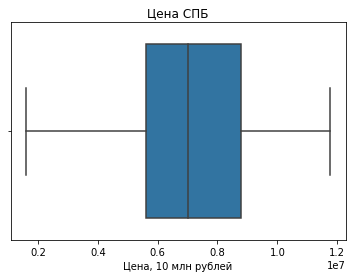

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


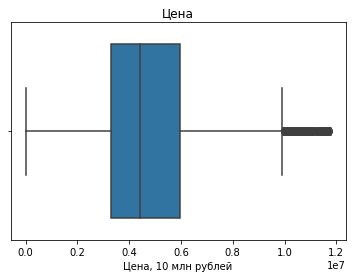

In [103]:
print(spb_centr['last_price'].describe())
sns.boxplot(spb_centr['last_price'])
plt.title('Цена СПБ')
plt.xlabel('Цена, 10 млн рублей')
plt.show()
sns.boxplot(data_good['last_price'])
plt.title('Цена')
plt.xlabel('Цена, 10 млн рублей')
plt.show()

#### Число комнат

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    2617.000000
mean        2.230417
std         0.950225
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


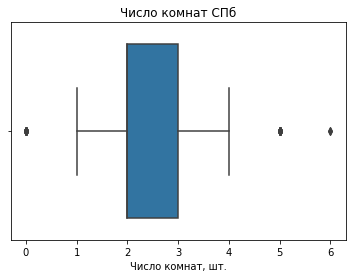

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


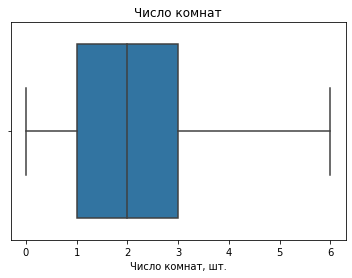

In [104]:
print(spb_centr['rooms'].describe())
sns.boxplot(spb_centr['rooms'])
plt.title('Число комнат СПб')
plt.xlabel('Число комнат, шт.')
plt.show()
sns.boxplot(data_good['rooms'])
plt.title('Число комнат')
plt.xlabel('Число комнат, шт.')
plt.show()

#### Высота потолков

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    2617.000000
mean        2.847757
std         0.286513
min         2.400000
25%         2.650000
50%         2.700000
75%         3.000000
max         3.980000
Name: ceiling_height, dtype: float64


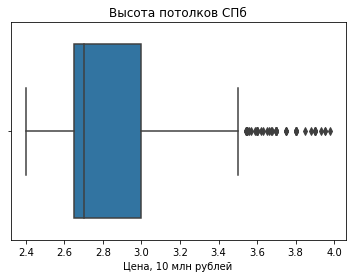

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


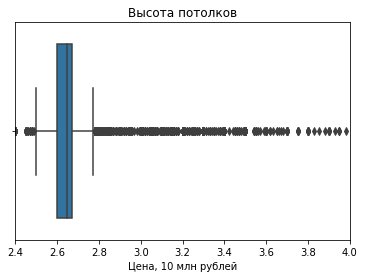

In [105]:
print(spb_centr['ceiling_height'].describe())
sns.boxplot(spb_centr['ceiling_height'])
plt.title('Высота потолков СПб')
plt.xlabel('Цена, 10 млн рублей')
plt.show()
sns.boxplot(data_good['ceiling_height'])
plt.title('Высота потолков')
plt.xlim(2.4, 4.0)
plt.xlabel('Цена, 10 млн рублей')
plt.show()

#### Число комнат, этаж, удалённость от центра, дата размещения объявления

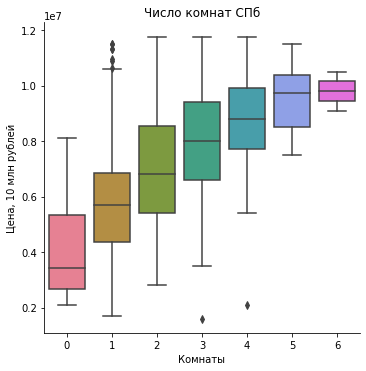

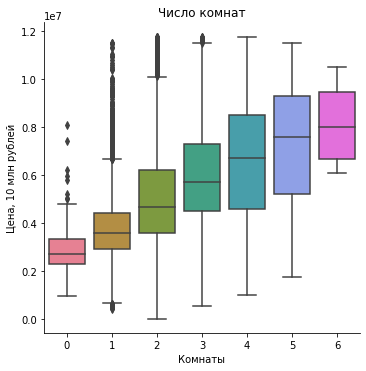

In [106]:
sns.catplot(x='rooms', y="last_price", kind="box", data=spb_centr, palette='husl')
plt.title('Число комнат СПб')
plt.xlabel('Комнаты')
plt.ylabel('Цена, 10 млн рублей')
plt.show()
sns.catplot(x='rooms', y="last_price", kind="box", data=data_good, palette='husl')
plt.title('Число комнат')
plt.xlabel('Комнаты')
plt.ylabel('Цена, 10 млн рублей')
plt.show()

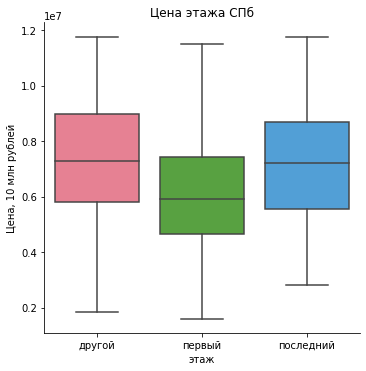

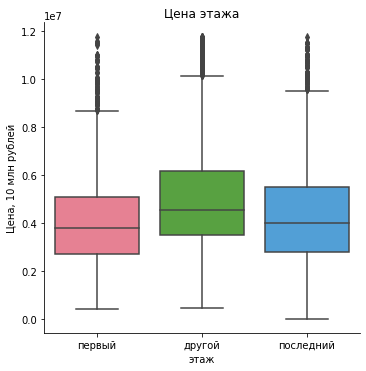

In [107]:
sns.catplot(x='floor_category', y="last_price", kind="box", data=spb_centr, palette='husl')
plt.title('Цена этажа СПб')
plt.xlabel('этаж')
plt.ylabel('Цена, 10 млн рублей')
plt.show()
sns.catplot(x='floor_category', y="last_price", kind="box", data=data_good, palette='husl')
plt.title('Цена этажа')
plt.xlabel('этаж')
plt.ylabel('Цена, 10 млн рублей')
plt.show()

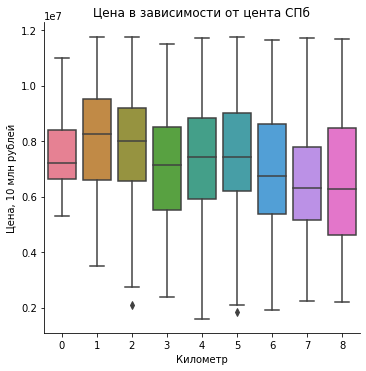

In [108]:
sns.catplot(x='centers_km', y="last_price", kind="box", data=spb_centr, palette='husl')
plt.title('Цена в зависимости от цента СПб')
plt.xlabel('Километр')
plt.ylabel('Цена, 10 млн рублей')
plt.show()

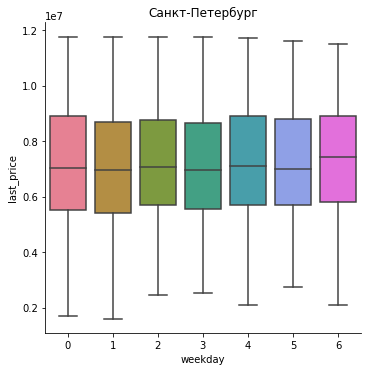

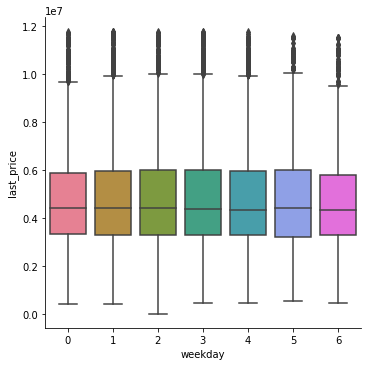

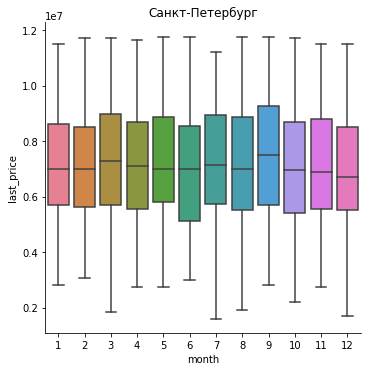

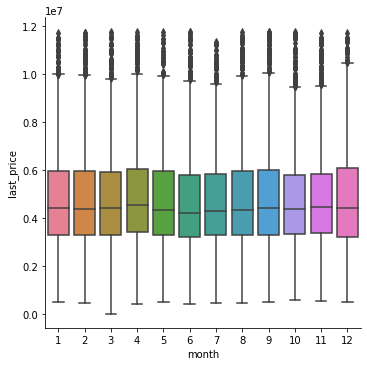

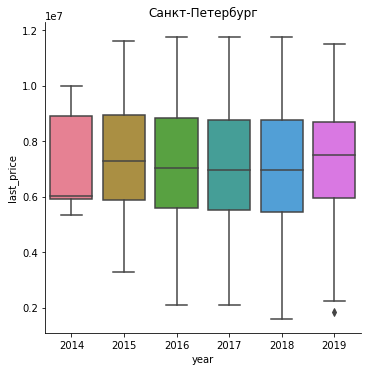

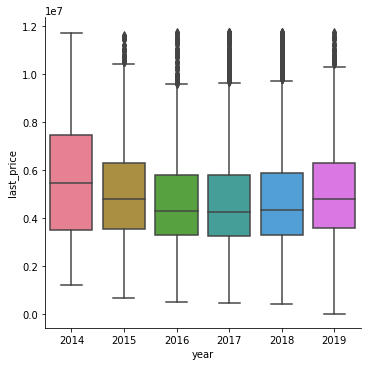

In [109]:
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_centr, palette='husl')
    plt.title('Санкт-Петербург')
    plt.show()
    sns.catplot(x=column, y="last_price", kind="box", data=data_good, palette='husl')
    

Площадь квартир в центре СПб больше, чем в остальных районах в 1,5 раза  
Цена квартир в центре СПб так же выше, чем в остальных районах  
Квартиры в центре имеют большее количество комнат  
Высота потолков в центре славится своим размахом  
Динамика цен с увеличением количества комнат в целом одинакова  
Выделяется цена за последние этажи в центре, чем выше, тем больше шансов иметь красивый вид  
Цена в зависимости от удаленности от центра снижается  
В целом события 2014 года меньше повлияли на стоимость недвижимости в центре.  

<a id="5"></a>
### Шаг 5. Общий вывод

#### Для оценки рыночной стоимости недвижимости важны следующие параметры:

1. Общая площадь квартиры (аномальные значения: более 114,25 кв. м)
2. Расстояние до центра города (центр города ограничен окружностью радиусом 8 км)
3. Число комнат влияет на площадь квартиры
4. Первые этажи всегда будут с дисконтом, высокий этаж ценится ближе к центру.
5. Высокие потолки будут привлекательнее
6. Правильная оценка недвижимости скажется на сроке продажи квартиры.( 200 дней это уже срок задумается, но бывает что квартира продавалась более года)
